# Handwritten Digit recognition using CNN

# import the libararies 

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Preprocessing data

In [6]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Create the model

In [7]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])



# Train the model

In [8]:
hist=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 80s 168ms/step - loss: 2.2881 - accuracy: 0.1423 - val_loss: 2.2635 - val_accuracy: 0.3644
Epoch 2/10
469/469 [==============================] - 160s 342ms/step - loss: 2.2443 - accuracy: 0.2700 - val_loss: 2.2079 - val_accuracy: 0.5602
Epoch 3/10
469/469 [==============================] - 270s 576ms/step - loss: 2.1838 - accuracy: 0.3907 - val_loss: 2.1294 - val_accuracy: 0.6116
Epoch 4/10
469/469 [==============================] - 267s 567ms/step - loss: 2.0983 - accuracy: 0.4773 - val_loss: 2.0152 - val_accuracy: 0.6524
Epoch 5/10
469/469 [==============================] - 245s 522ms/step - loss: 1.9688 - accuracy: 0.5475 - val_loss: 1.8463 - val_accuracy: 0.6947
Epoch 6/10
469/469 [==============================] - 264s 563ms/step - loss: 1.7884 - accuracy: 0.6001 - val_loss: 1.6157 - val_accuracy: 0.7402
Epoch 7/10
469/469 [==============================] - 274s 583ms/step - loss: 1.5642 - accuracy: 0.6421 - val_loss: 1.3502 - 

C:\Users\karthi\anaconda3\envs\object\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving the model as mnist.h5


# Evaluate the model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7829153537750244
Test accuracy: 0.83160001039505


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2359552   
                                                      

#  Predict digits

1/1 [==============================] - 0s 93ms/step


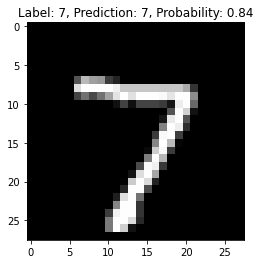

1/1 [==============================] - 0s 29ms/step


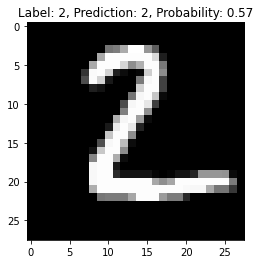

1/1 [==============================] - 0s 17ms/step


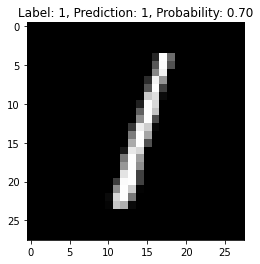

1/1 [==============================] - 0s 25ms/step


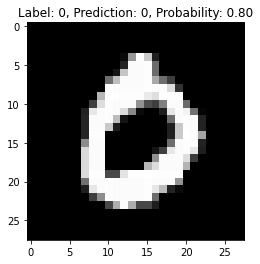

1/1 [==============================] - 0s 22ms/step


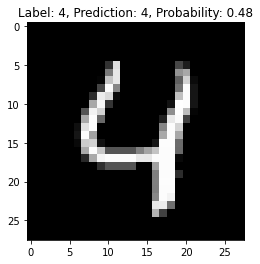

1/1 [==============================] - 0s 23ms/step


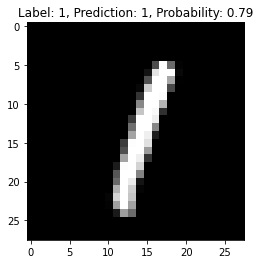

1/1 [==============================] - 0s 30ms/step


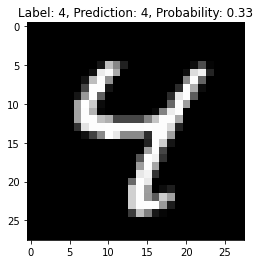

1/1 [==============================] - 0s 26ms/step


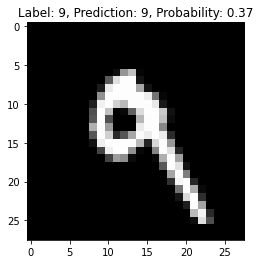

1/1 [==============================] - 0s 28ms/step


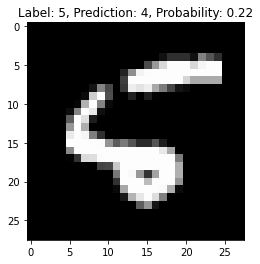

1/1 [==============================] - 0s 31ms/step


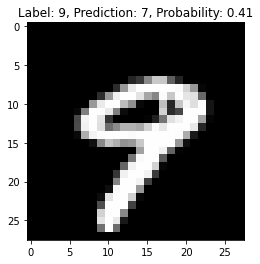

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('mnist.h5')

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1) / 255.0  # Normalize and add channel dimension

# Test the model with some test images
for i in range(10):
    img = x_test[i]
    label = y_test[i]
    img = np.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img)[0]
    predicted_class = np.argmax(prediction)
    probability = np.max(prediction)
    
    # Plot the image and prediction
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f'Label: {label}, Prediction: {predicted_class}, Probability: {probability:.2f}')
    plt.show()
